## Magnetic Materials - NTUA 2022-23 - Lab Report 2 <br>
Ηλιόπουλος Γεώργιος - 03118815

# 1.2 Αισθητήρας θέσης

### 1.2.2 Επεξεργασία Μετρήσεων

>1. Σχεδιάστε τα διαγράμματα των αρχείων CSV, που αντιστοιχούν στις αποστάσεις μετρήσεων. Ποιο μέγεθος διαφοροποιείται συναρτήσει της απόστασης;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_csv (file, distance):
    
    df = pd.read_csv(file)
    
    time = df["second"].to_numpy()
    Vout = df["Volt"].to_numpy()
    
    plt.plot(time, Vout)
    plt.grid()
    plt.title("Receiver Coil Signal - distance {}mm".format(distance))
    plt.xlabel("Time (s)")
    plt.ylabel("Receiver Signal (V)")

> Γραφημα για απόσταση 100mm:

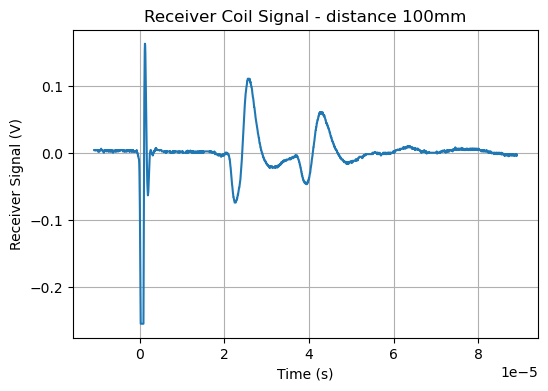

In [3]:
fig=plt.figure(figsize=(6,4))
plot_csv ("100mm.csv", "100")

> Γραφημα για απόσταση 150mm:

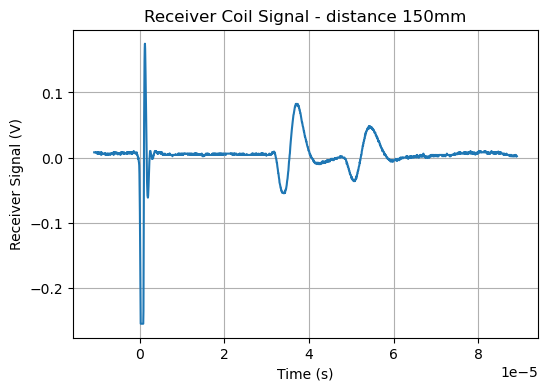

In [4]:
fig=plt.figure(figsize=(6,4))
plot_csv ("150mm.csv", "150")

> Γραφημα για απόσταση 200mm:

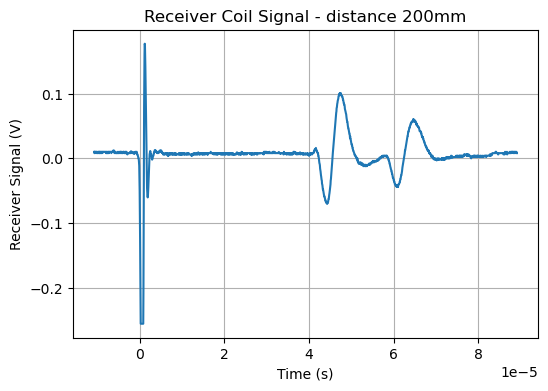

In [5]:
fig=plt.figure(figsize=(6,4))
plot_csv ("200mm.csv", "200")

> Γραφημα για απόσταση 250mm:

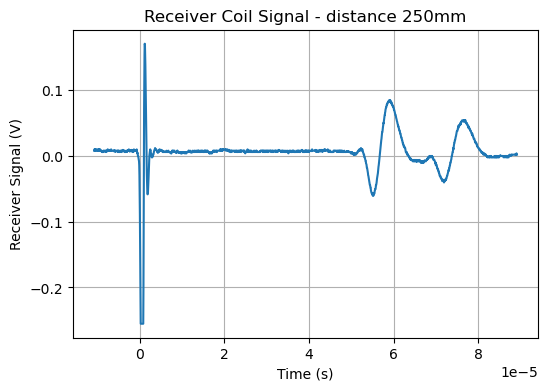

In [6]:
fig=plt.figure(figsize=(6,4))
plot_csv ("250mm.csv", "250")

>2. Βάσει των μετρήσεων των παραπάνω διαγραμμάτων, δημιουργήστε μια καμπύλη που θα εκφράζει την απόσταση των πηνίων συναρτήσει του μεγέθους που διαφοροποιείται.

In [7]:
dist = [0.100, 0.150, 0.200, 0.250]
dt = [0.000021, 0.000033, 0.000043, 0.000054]

Text(0.5, 1.0, 'Distaces for different Δt')

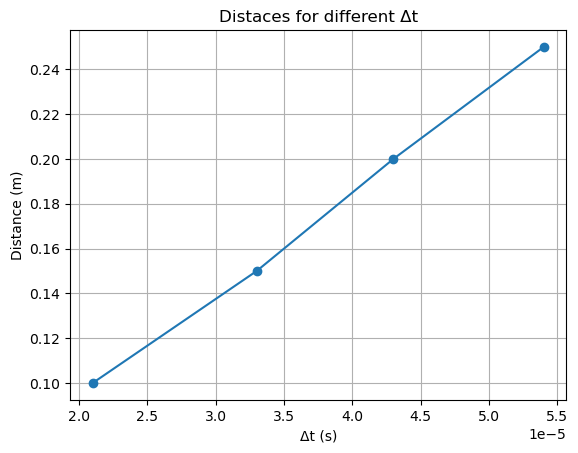

In [8]:
plt.plot(dt, dist, '-o')

plt.ylabel("Distance (m)")
plt.xlabel("Δt (s)")

plt.grid()
plt.title("Distaces for different Δt")

Βρίσκουμε την ακριβή γραμική καμπύλη που περικλύει τα δεδομένα μας.

In [9]:
from scipy.optimize import curve_fit

In [10]:
x, y = dt, dist

def objective(x, a, b):
    return a * x + b

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 4581.75709 * x + 0.00204


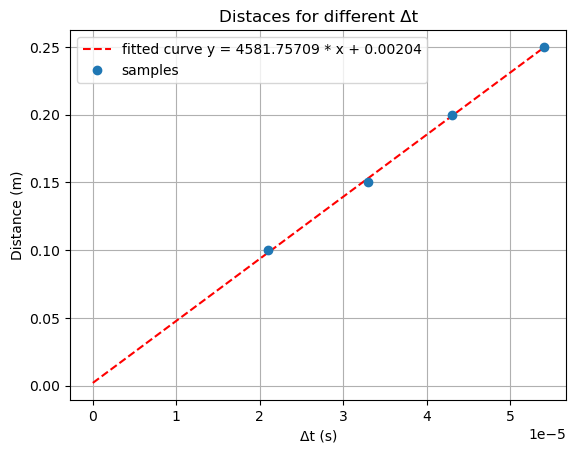

In [11]:
x = np.linspace(0, 0.000054, num=10)
y = a * x + b

plt.plot(x, y, '--', color = 'r')
plt.plot(dt, dist, 'o')

plt.ylabel("Distance (m)")
plt.xlabel("Δt (s)")

plt.grid()
plt.title("Distaces for different Δt")

plt.legend(["fitted curve y = 4581.75709 * x + 0.00204", "samples"])

# 1.3 Αισθητήρας μηχανικής πίεσης

### 1.2.2 Επεξεργασία Μετρήσεων

>1. Σχεδιάστε τα διαγράμματα των αρχείων CSV, που αντιστοιχούν στα πρότυπα βάρη. Ποιο μέγεθος διαφοροποιείται συναρτήσει αυτών;

In [12]:
def plot_csv (file, weight):
    
    df = pd.read_csv(file)
    
    time = df["second"].to_numpy()
    Vout = df["Volt"].to_numpy()
    
    plt.plot(time, Vout)
    plt.grid()
    plt.title("Receiver Coil Signal - weight {}g".format(weight))
    plt.xlabel("Time (s)")
    plt.ylabel("Receiver Signal (V)")

> Γραφημα για βάρος 5g:

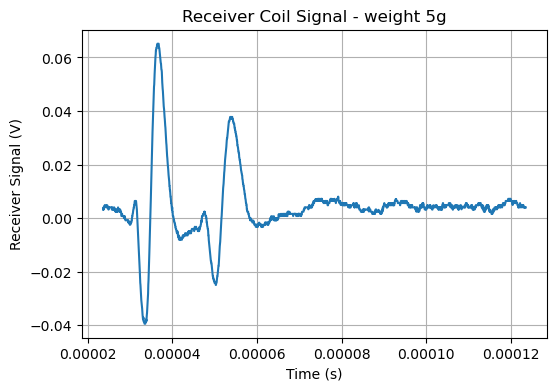

In [13]:
fig=plt.figure(figsize=(6,4))
plot_csv ("5g.csv", "5")

> Γραφημα για βάρος 20g:

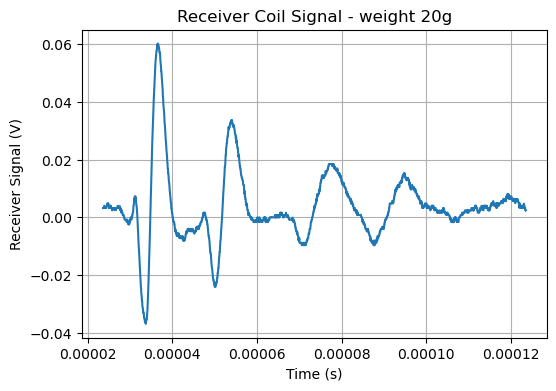

In [14]:
fig=plt.figure(figsize=(6,4))
plot_csv ("20g.csv", "20")

> Γραφημα για βάρος 100g:

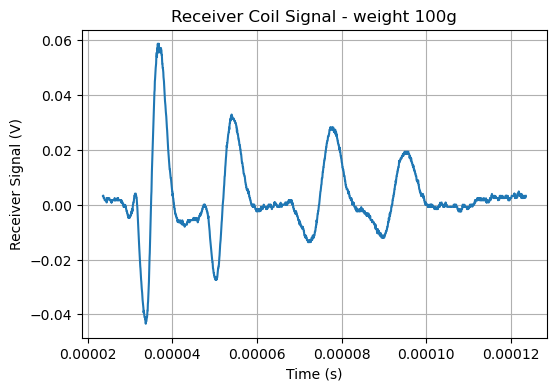

In [15]:
fig=plt.figure(figsize=(6,4))
plot_csv ("100g.csv", "100")

> Γραφημα για βάρος 200g:

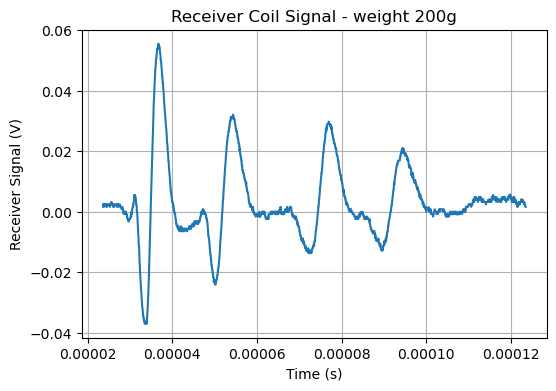

In [16]:
fig=plt.figure(figsize=(6,4))
plot_csv ("200g.csv", "200")

>2. Βάσει των προηγούμενων διαγραμμάτων, δημιουργήστε μια καμπύλη που θα εκφράζει τη μάζα ενός αντικειμένου συναρτήσει του μεγέθους που διαφοροποιείται.

In [17]:
mass = [0.005, 0.02, 0.1, 0.2]
V = [0.00965, 0.02815, 0.04148, 0.0434]

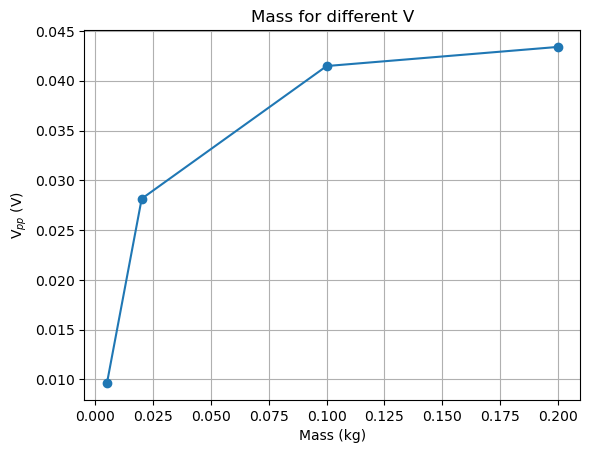

In [18]:
plt.plot(mass, V, '-o')

plt.ylabel("V$_{pp}$ (V)")
plt.xlabel("Mass (kg)")
plt.title("Mass for different V")
plt.grid()

In [19]:
x, y = mass, V

def objective(x, a, b, c):
     return a * x + b * x**2 + c

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 0.46331 * x + -1.55907 * x^2 + 0.01268


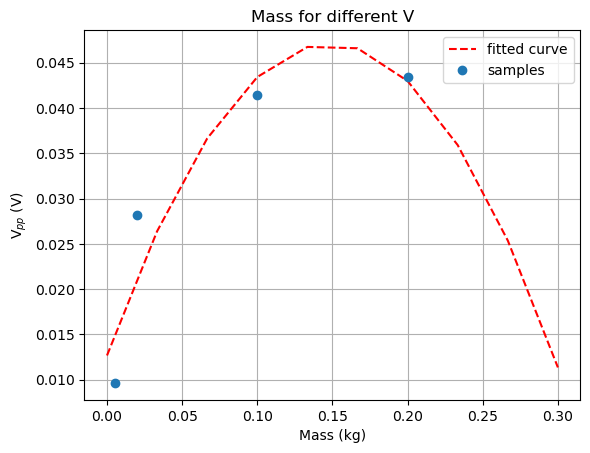

In [20]:
x = np.linspace(0, 0.3, num=10)
y = a * x + b * (x**2) + c

plt.plot(x, y, '--', color = 'r')
plt.plot(mass, V, 'o')

plt.ylabel("V$_{pp}$ (V)")
plt.xlabel("Mass (kg)")
plt.title("Mass for different V")

plt.grid()

plt.legend(["fitted curve", "samples"])

y = 0.14453 * log(x) + 0.01893


C:\Users\grgsl\AppData\Local\Temp\ipykernel_2684\1907068172.py:6: RuntimeWarning: divide by zero encountered in log
  y = a * np.log(x) + b


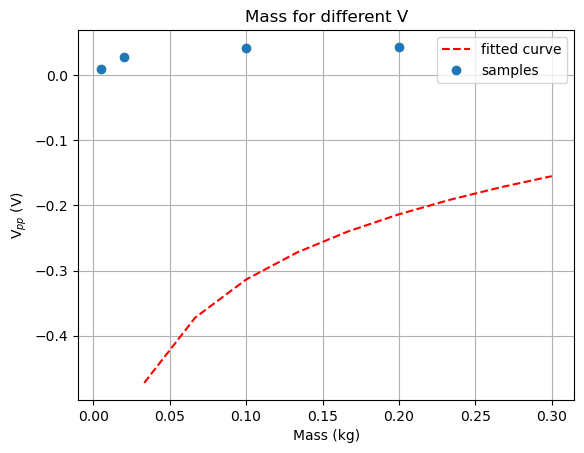

In [21]:
p = np.polyfit(mass, V, 1);
a = p[0]
b = p[1]
x = np.linspace(0, 0.3, 10)
print('y = %.5f * log(x) + %.5f' % (a, b))
y = a * np.log(x) + b

plt.plot(x, y, '--', color = 'r')
plt.plot(mass, V, 'o')

plt.ylabel("V$_{pp}$ (V)")
plt.xlabel("Mass (kg)")
plt.title("Mass for different V")

plt.grid()

plt.legend(["fitted curve", "samples"])